In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns







In [21]:
#zadanie1
#zmienne zależne (y):  WorkWeekHrs , zmienne niezależne (x1, x2): Age, CodeRevHrs
#5 kolumn z danymi numerycznymi, 1 kolumna z danymi tekstowymi i 1 kolumna z danymi jakościowymi
df = pd.read_csv('survey_results_public.csv', usecols=['YearsCode', 'Age1stCode', 'Age', 'WorkWeekHrs',
                       'CodeRevHrs', 'Hobbyist', 'Sexuality'])

In [22]:
#zadanie2
df.dropna(inplace=True)
df.replace(to_replace={'Yes': '1', 'No': '0'}, inplace=True)
print(df.corr())

# metoda one-hot encoding
one_hot = pd.get_dummies(df['Sexuality'])
df = df.drop('Sexuality',axis = 1)
df = df.join(one_hot)

             WorkWeekHrs  CodeRevHrs       Age
WorkWeekHrs     1.000000    0.028982 -0.008900
CodeRevHrs      0.028982    1.000000 -0.020597
Age            -0.008900   -0.020597  1.000000


In [20]:
#Zadanie 3
#Średnia arytmetyczna i odchylenie standardowe
mean1 = (np.mean(df['Age']))
sd1 = np.std(df['Age'])

mean2 = (np.mean(df['WorkWeekHrs']))
sd2 = np.std(df['WorkWeekHrs'])

#usuwanie wartości odstających
df_without_outliers = df[(df['Age'] >= (mean1 - 2 *sd1))]

#Usuwanie wartości odstającyh(odchylenie standardowe)
df_without_outliers_2 = df_without_outliers[(df_without_outliers['WorkWeekHrs'] >= (mean2 - 2 *sd2))]

#Usuwanie wartości odstających (kwantyl)
kwantyl2 = df_without_outliers_2[(df_without_outliers_2['CodeRevHrs'] >= df_without_outliers_2['CodeRevHrs'].quantile(.15)) & (df_without_outliers_2['CodeRevHrs'] <=
            df_without_outliers_2['CodeRevHrs'].quantile(.85))]

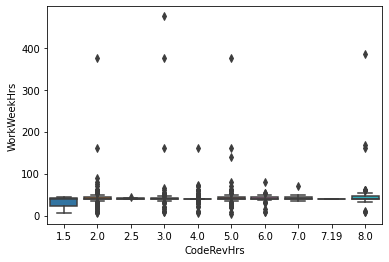

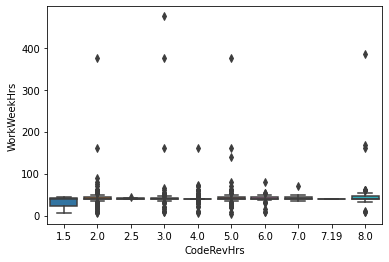

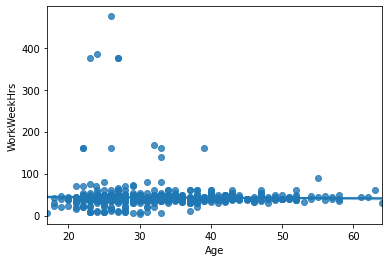

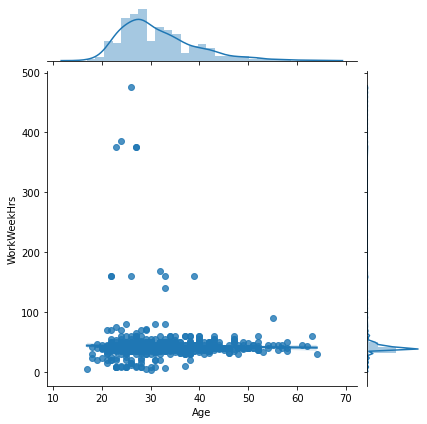

[[47.95261682]]
[[64.46600978]]
Error: WorkWeekHrs    777.259723
dtype: float64
[[-0.07246263  0.59103052]]
Error: WorkWeekHrs    1136.032957
dtype: float64
Error: WorkWeekHrs    1133.020971
dtype: float64


In [18]:
#Zadanie4
#Wykresy
sns.boxplot(y=kwantyl2['WorkWeekHrs'], x=kwantyl2['CodeRevHrs'], data=kwantyl2)
plt.show()
sns.boxplot(y=kwantyl2['WorkWeekHrs'], x=kwantyl2['CodeRevHrs'], data=kwantyl2)
plt.show()

sns.regplot(y=kwantyl2['WorkWeekHrs'], x=kwantyl2['Age'])
plt.show()

sns.jointplot(x=kwantyl2['Age'], y=kwantyl2['WorkWeekHrs'], data=kwantyl2, kind='reg')
plt.show()

#Model regresji liniowej
regl = linear_model.LinearRegression()
regl.fit(kwantyl2[['CodeRevHrs']], kwantyl2[['WorkWeekHrs']])
print(regl.predict([[12]]))
print(regl.predict([[40]]))
mse = np.mean((regl.predict(kwantyl2[['CodeRevHrs']]) - kwantyl2[['WorkWeekHrs']]) ** 2)
print("Error:", mse)

regl = linear_model.LinearRegression()
regl.fit(kwantyl2[['Age', 'CodeRevHrs']], kwantyl2[['WorkWeekHrs']])
print(regl.coef_)
mse = np.mean((regl.predict(kwantyl2[['CodeRevHrs', 'Age']]) - kwantyl2[['WorkWeekHrs']]) ** 2)
print("Error:", mse)

regl = linear_model.LinearRegression()
regl.fit(kwantyl2[['Age', 'CodeRevHrs', 'Hobbyist']], kwantyl2[['WorkWeekHrs']])
mse = np.mean((regl.predict(kwantyl2[['CodeRevHrs', 'Age', 'Hobbyist']]) - kwantyl2[['WorkWeekHrs']]) ** 2)
print("Error:", mse)